<a href="https://colab.research.google.com/github/renatamontanhana/Analise-Exploratoria-de-Dados-de-Vendas-do-Mkt-Place-MERCADO-LIVRE/blob/main/M4A36_An%C3%A1lise_de_Dados_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://cienciadosdados.com/images/cdp.png)
> #   Análise Exploratória de Dados de Vendas do Marketing Place
 > #  <font color = blue> MERCADO LIVRE

![](https://certificadocursosonline.com/blog/wp-content/uploads/2020/05/como-comprar-no-mercado-livre.jpg)


--  Você é o Cientista de Dados do Mercado Livre. Seu **objetivo é realizar Análise Exploratória** dos dados deste E-commerce.

-- Para Isso, vc deve **responder algumas perguntas**,Poderosas, sobre o negócio em si.

-- **Os dados contêm centenas de milhares de compras** em lojas de eletrônicos divididas por mês, tipo de produto, custo, endereço de compra, etc. de 12 meses.

-- Vamos, inicialmente, analisar esses dados usando somente nosso querido **pandas e o matplotlib**, para análise gráfica dos dados.

In [1]:
import pandas as pd

### Leia os dados ou importe os dados

In [2]:
data=pd.read_csv('/content/Sales_data.csv')

### veja nossos dados

In [3]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
155157,259712,AAA Batteries (4-pack),1,2.99,10/06/19 22:14,"625 Lincoln St, Los Angeles, CA 90001"
155158,259713,34in Ultrawide Monitor,1,379.99,10/17/19 11:58,"777 2nd St, Los Angeles, CA 90001"
155159,259714,Apple Airpods Headphones,1,150,10/07/19 17:34,"509 Elm St, New York City, NY 10001"
155160,259715,Lightning Charging Cable,1,14.95,10/21/19 11:37,"317 River St, New York City, NY 10001"


#### Aqui vc Precisa conhecer as dimensões dos dados. Os domínios dos campos. Se existe valores ausentes ou duplicados. De boa?

In [4]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


### Verifique o tamanho dos nossos dados usando .shape
###### Mostra o número total de registros/linhas e colunas em nosso conjunto de dados

In [5]:
data.shape

(155162, 6)

### A função  ".columns" nos mostra o nome das colunas

In [7]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

### A função ".index" para verificar a indexação do nosso conjunto de dados

In [8]:
data.index

RangeIndex(start=0, stop=155162, step=1)

### A função ".nunique()" no mostra o número total de valores únicos em cada coluna do dataframe.

In [9]:
data.nunique()

Order ID            148151
Product                 21
Quantity Ordered        10
Price Each              24
Order Date          118407
Purchase Address    121437
dtype: int64

### A função ".value_counts()" nos mostra quais são esses valores únicos

In [10]:
data['Quantity Ordered'].value_counts()

1                   139926
2                    11093
3                     2433
4                      657
Quantity Ordered       305
5                      205
6                       71
7                       21
8                        3
9                        3
Name: Quantity Ordered, dtype: int64

### verifique o "tipo de dados" (numéricos ou textuais) de nossos dados
###### .info() fornece todas as informações sobre os dados

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155162 entries, 0 to 155161
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          154718 non-null  object
 1   Product           154718 non-null  object
 2   Quantity Ordered  154717 non-null  object
 3   Price Each        154717 non-null  object
 4   Order Date        154717 non-null  object
 5   Purchase Address  154717 non-null  object
dtypes: object(6)
memory usage: 7.1+ MB


In [12]:
# A função dtype mostra o type para uma variável específica
data['Price Each'].dtype

dtype('O')

### Verificar Existe algum valor ausente (missing values)

In [13]:
data.isnull().sum()

Order ID            444
Product             444
Quantity Ordered    445
Price Each          445
Order Date          445
Purchase Address    445
dtype: int64

In [14]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [15]:
# Eliminar os valores missing.
## obs: Mais para frente, vc descobre que pode fazer um trabalho de substituição de valores missing, ao invés de simplesmente eliminá-lo
## O nome desse processamento se chama IMPUTAÇÃO.
data.dropna(inplace=True)

In [16]:
data.shape

(154717, 6)

In [17]:
data.duplicated().sum()

517

![](https://media.seudinheiro.com/uploads/2021/03/144154916_10159173164648506_4365628844580661971_o-628x353.png)

### O que é importante saber num business? Qual é o problema de negócio? Onde estão os números sensíveis do negócio. Onde entra o cash. Onde está o furo no tanque de combustível?

![](https://cienciadosdados.com/images/startse.png)

### Análise 1: Qual foi o melhor mês para vendas? Quanto foi ganho nesse mês?

In [18]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [19]:
data['Month']=data['Order Date'].str[0:2]
data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
155156,259711,USB-C Charging Cable,1,11.95,10/10/19 14:19,"145 Walnut St, Los Angeles, CA 90001",10
155157,259712,AAA Batteries (4-pack),1,2.99,10/06/19 22:14,"625 Lincoln St, Los Angeles, CA 90001",10
155158,259713,34in Ultrawide Monitor,1,379.99,10/17/19 11:58,"777 2nd St, Los Angeles, CA 90001",10
155159,259714,Apple Airpods Headphones,1,150,10/07/19 17:34,"509 Elm St, New York City, NY 10001",10


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154717 entries, 0 to 155160
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          154717 non-null  object
 1   Product           154717 non-null  object
 2   Quantity Ordered  154717 non-null  object
 3   Price Each        154717 non-null  object
 4   Order Date        154717 non-null  object
 5   Purchase Address  154717 non-null  object
 6   Month             154717 non-null  object
dtypes: object(7)
memory usage: 9.4+ MB


In [ ]:
data['Month'].astype('int32')

In [21]:
data=data[data['Order Date'].str[0:2] != 'Or']

In [22]:
data['Month']=data['Order Date'].str[0:2]
data['Month'].astype('int32')

<ipython-input-22-0c386196386e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']=data['Order Date'].str[0:2]


0          4
2          4
3          4
4          4
5          4
          ..
155156    10
155157    10
155158    10
155159    10
155160    10
Name: Month, Length: 154412, dtype: int32

In [23]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [24]:
look_up={'01':'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
           '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}


data['Month']= data['Month'].apply(lambda x: look_up[x])

<ipython-input-24-04cc0772c4f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']= data['Month'].apply(lambda x: look_up[x])


In [25]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154412 entries, 0 to 155160
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          154412 non-null  object
 1   Product           154412 non-null  object
 2   Quantity Ordered  154412 non-null  object
 3   Price Each        154412 non-null  object
 4   Order Date        154412 non-null  object
 5   Purchase Address  154412 non-null  object
 6   Month             154412 non-null  object
dtypes: object(7)
memory usage: 9.4+ MB


In [ ]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [28]:
# Vamos converter os valores objects em float (numéricos)

# Transformar a coluna Quantity Ordered
data['Quantity Ordered']= data['Quantity Ordered'].astype('float')

# Transformar a coluna Price Each
data['Price Each']=data['Price Each'].astype('float')

<ipython-input-28-def2c8a733a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity Ordered']= data['Quantity Ordered'].astype('float')
<ipython-input-28-def2c8a733a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Each']=data['Price Each'].astype('float')


In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [31]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154412 entries, 0 to 155160
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          154412 non-null  object 
 1   Product           154412 non-null  object 
 2   Quantity Ordered  154412 non-null  float64
 3   Price Each        154412 non-null  float64
 4   Order Date        154412 non-null  object 
 5   Purchase Address  154412 non-null  object 
 6   Month             154412 non-null  object 
 7   Sales             154412 non-null  float64
dtypes: float64(3), object(5)
memory usage: 10.6+ MB


In [33]:
highest_sales=data.groupby('Month').sum()

In [34]:
highest_sales.head()

,Quantity Ordered,Price Each,Sales
Month,,,
Apr,20558.0,3367671.02,3390670.24
Aug,13448.0,2230345.42,2244467.88
Dec,28114.0,4588415.41,4613443.34
Feb,13449.0,2188884.72,2202022.42
Jan,10903.0,1811768.38,1822256.73


In [35]:
highest_sales.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
Apr,20558.0,3367671.02,3390670.24
Aug,13448.0,2230345.42,2244467.88
Dec,28114.0,4588415.41,4613443.34
Feb,13449.0,2188884.72,2202022.42
Jan,10903.0,1811768.38,1822256.73
Jul,16072.0,2632539.56,2647775.76
Jun,15253.0,2562025.61,2577802.26
Mar,17005.0,2791207.83,2807100.38
May,18667.0,3135125.13,3152606.75


In [36]:
import matplotlib.pyplot as plt

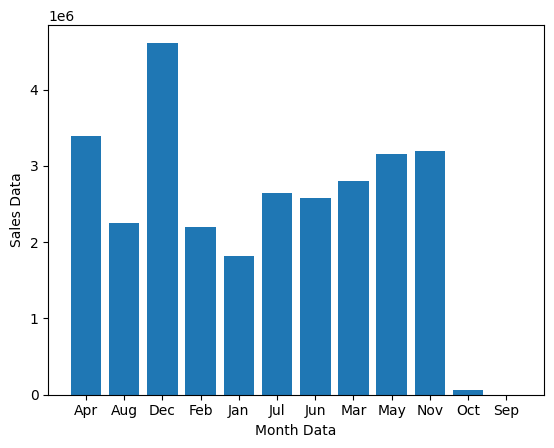

In [37]:
plt.figure()
plt.bar(highest_sales.index,highest_sales['Sales'])
plt.xlabel('Month Data')
plt.ylabel('Sales Data')
plt.show()

### Análise 2: Qual cidade vendeu mais produto?

In [38]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99


In [39]:
df='How,are,you'
df.split(',')

['How', 'are', 'you']

In [40]:
data['City']=data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [41]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles


In [42]:
city_sold=data.groupby('City').sum()

In [43]:
city_sold.head(10)

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,13810.0,2311278.55,2323756.27
Austin,9172.0,1505066.12,1513028.29
Boston,18665.0,3033410.04,3053056.97
Dallas,13901.0,2276794.51,2289237.83
Los Angeles,27536.0,4470777.84,4497203.33
New York City,23321.0,3857837.84,3883640.53
Portland,11693.0,1928332.39,1938256.79
San Francisco,41944.0,6899426.15,6942796.31
Seattle,13646.0,2265649.73,2277013.18


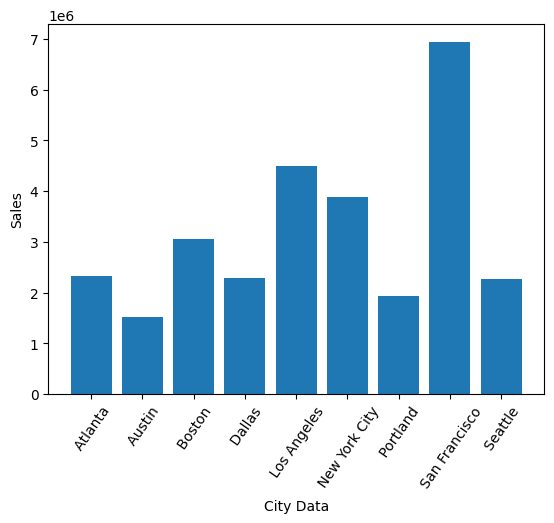

In [44]:
#plt.show()
plt.bar(city_sold.index,city_sold['Sales'])
plt.xticks(rotation=55)
plt.xlabel('City Data')
plt.ylabel('Sales')
plt.show()

### Análise 3: A que horas devemos exibir anúncios para maximizar a probabilidade de o cliente comprar produtos?

In [46]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles


In [47]:
data['Time']=data['Order Date'].str[9:11]

In [48]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [49]:
time_data=data.groupby('Time').sum()
time_data

,Quantity Ordered,Price Each,Sales
Time,,,
00,3658.0,581934.58,585763.38
01,2146.0,377622.70,379354.12
02,1156.0,183724.66,184574.15
03,771.0,123046.57,123905.85
04,779.0,133083.80,133481.07
05,1240.0,193826.35,194570.49
06,2327.0,359514.01,362294.51
07,3793.0,630850.70,634357.19
08,5887.0,1001233.24,1005965.59


In [50]:
time_data.sort_values(by=['Sales'], ascending=False)

,Quantity Ordered,Price Each,Sales
Time,,,
19,12030.0,1988665.17,2000508.09
20,11537.0,1923681.76,1934988.10
12,11725.0,1915561.56,1928999.79
11,11619.0,1898584.04,1908686.75
18,11540.0,1851585.10,1861470.04
13,11341.0,1792033.13,1805500.06
17,10117.0,1762831.84,1773358.63
14,10253.0,1706964.33,1717036.45
21,10103.0,1665422.96,1675494.29


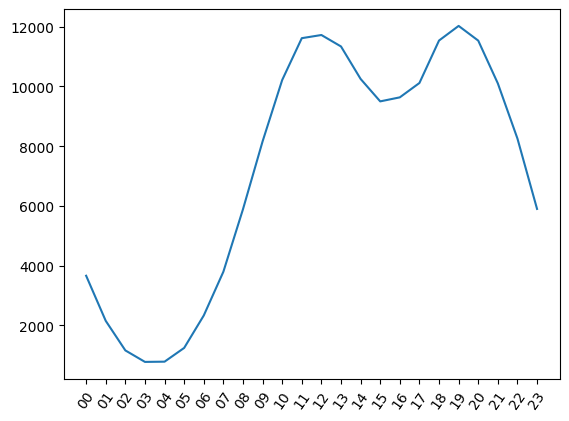

In [51]:
plt.show()
#plt.plot(time_data.index,time_data['Sales'])
plt.plot(time_data.index,time_data['Quantity Ordered'])
plt.xticks(rotation=55)
plt.show()

### Análise 4: Quais são os produtos mais vendidos juntos?

In [52]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [53]:
duplicated_data=data[data['Order ID'].duplicated(keep=False)]

In [54]:
duplicated_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11
31,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11


In [55]:
duplicated_data['Product_bundle']=duplicated_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [56]:
duplicated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Product_bundle
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [57]:
duplicated_data=duplicated_data[['Order ID','Product_bundle']].drop_duplicates()

In [58]:
duplicated_data.head()

,Order ID,Product_bundle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [59]:
from itertools import combinations
from collections import Counter

In [60]:
count=Counter()
for row in duplicated_data['Product_bundle']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(3)

[(('iPhone', 'Lightning Charging Cable'), 855),
 (('Google Phone', 'USB-C Charging Cable'), 827),
 (('iPhone', 'Wired Headphones'), 364)]

### Análise 5: Qual produto mais vendeu? Por que você acha que isso aconteceu?

In [61]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [62]:
product_max=data.groupby('Product').sum()

In [63]:
product_max.sort_values(by=['Sales'], ascending=False)

,Quantity Ordered,Price Each,Sales
Product,,,
Macbook Pro Laptop,3920.0,6657200.00,6664000.00
iPhone,5749.0,4020800.00,4024300.00
ThinkPad Laptop,3429.0,3427965.72,3428965.71
Google Phone,4608.0,2760600.00,2764800.00
27in 4K Gaming Monitor,5150.0,2004938.59,2008448.50
34in Ultrawide Monitor,5162.0,1955428.54,1961508.38
Apple Airpods Headphones,13055.0,1943400.00,1958250.00
Flatscreen TV,4006.0,1197300.00,1201800.00
Bose SoundSport Headphones,11185.0,1108089.18,1118388.15


In [64]:
product_max.sort_values(by=['Quantity Ordered'], ascending=False)

,Quantity Ordered,Price Each,Sales
Product,,,
AAA Batteries (4-pack),25807.0,51332.32,77162.93
AA Batteries (4-pack),22986.0,65518.08,88266.24
USB-C Charging Cable,19758.0,215673.60,236108.10
Lightning Charging Cable,19262.0,268442.20,287966.90
Wired Headphones,17021.0,187631.51,204081.79
Apple Airpods Headphones,13055.0,1943400.00,1958250.00
Bose SoundSport Headphones,11185.0,1108089.18,1118388.15
27in FHD Monitor,6291.0,937737.48,943587.09
iPhone,5749.0,4020800.00,4024300.00


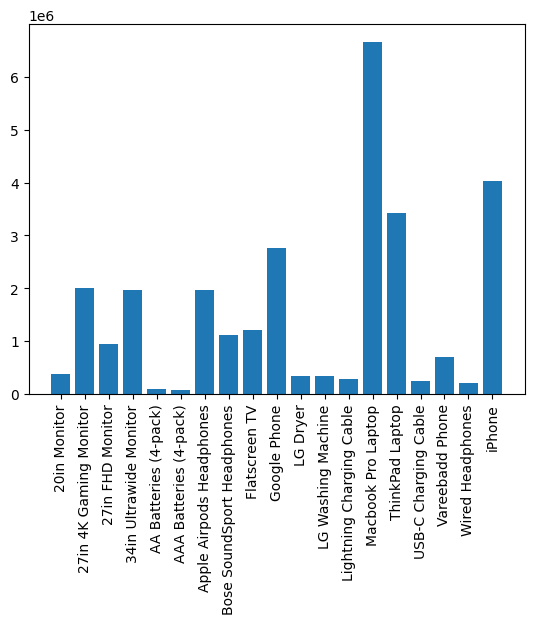

In [65]:
plt.figure()
plt.bar(product_max.index,product_max['Sales'])
plt.xticks(rotation=90)
plt.show()

<Figure size 640x480 with 0 Axes>

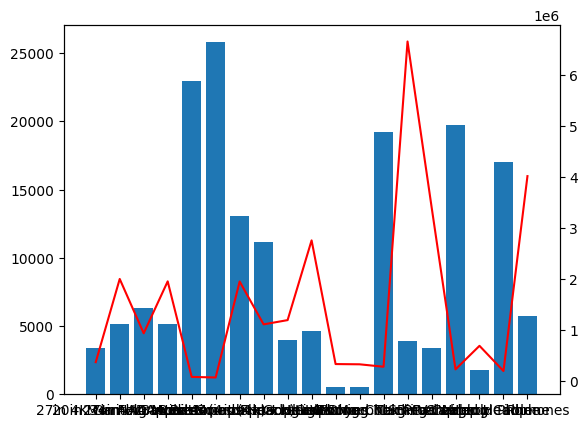

In [66]:
plt.figure()
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(product_max.index,product_max['Quantity Ordered'])
plt.xticks(rotation=90)
ax2.plot(product_max.index,product_max['Sales'],color='r')
plt.show()

##É só o começo...